In [101]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from pprint import pprint


# 1. Get data
## 1.1 Get other data
### 1.1.1 Oil price data

In [126]:
# get the historic oil price
# Define the stock ticker symbol and the date range
oil = yf.Ticker("CL=F") # a ticker object for crude oil price

# Retrieve historical data
oil_df = oil.history(period="max") #period: 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max
oil_df.index = pd.to_datetime(oil_df.index.strftime('%Y-%m-%d'))
oil_df.rename(columns={'Close': 'oil price'}, inplace=True)

# Print the last few rows of the data
print(oil_df.head())
print(oil_df.shape)

                 Open       High        Low  oil price  Volume  Dividends  \
Date                                                                        
2000-08-23  31.950001  32.799999  31.950001  32.049999   79385        0.0   
2000-08-24  31.900000  32.240002  31.400000  31.629999   72978        0.0   
2000-08-25  31.700001  32.099998  31.320000  32.049999   44601        0.0   
2000-08-28  32.040001  32.919998  31.860001  32.869999   46770        0.0   
2000-08-29  32.820000  33.029999  32.560001  32.720001   49131        0.0   

            Stock Splits  
Date                      
2000-08-23           0.0  
2000-08-24           0.0  
2000-08-25           0.0  
2000-08-28           0.0  
2000-08-29           0.0  
(5889, 7)


c:\Users\YX\Documents\QX\Finance-Analytics\.venv\lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


In [98]:
start_date = oil_df.index[0].strftime('%Y-%m-%d')
end_date = oil_df.index[-1].strftime('%Y-%m-%d')

### 1.1.2 US dollar index

In [125]:
usd = yf.Ticker("DX-Y.NYB") # a ticker object for USD index

# Retrieve historical data
usd_df = usd.history(start=start_date, end=end_date) #period: 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max
usd_df.index = pd.to_datetime(usd_df.index.strftime('%Y-%m-%d'))
usd_df.rename(columns={'Close': 'usd index'}, inplace=True)

# Print the first few rows of the data
usd_df

c:\Users\YX\Documents\QX\Finance-Analytics\.venv\lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


,Open,High,Low,usd index,Volume,Dividends,Stock Splits
Date,,,,,,,
2000-08-23,111.809998,112.260002,111.370003,111.419998,0,0.0,0.0
2000-08-24,111.260002,111.519997,110.989998,111.230003,0,0.0,0.0
2000-08-25,111.300003,111.690002,110.839996,111.349998,0,0.0,0.0
2000-08-28,111.260002,111.580002,111.070000,111.459999,0,0.0,0.0
2000-08-29,111.449997,112.349998,111.309998,112.199997,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-01-29,103.470001,103.820000,103.400002,103.610001,0,0.0,0.0
2024-01-30,103.440002,103.610001,103.309998,103.400002,0,0.0,0.0
2024-01-31,103.419998,103.739998,102.940002,103.269997,0,0.0,0.0


Text(0, 0.5, 'Crude Oil Price')

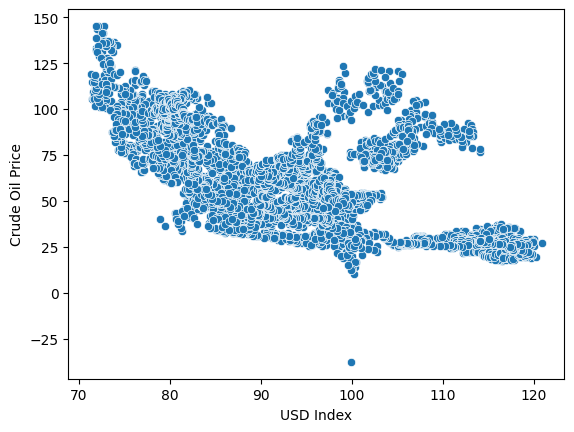

In [117]:
sns.scatterplot(x=usd_df['Close'], y=oil_df['Close'])
plt.xlabel('USD Index')
plt.ylabel('Crude Oil Price')

### 1.1.3 US 10-year treasure bond

In [124]:
t10 = yf.Ticker("^TNX") # a ticker object for crude oil price

# Retrieve historical data
t10_df = t10.history(start=start_date, end=end_date) #period: 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max
t10_df.index = pd.to_datetime(t10_df.index.strftime('%Y-%m-%d'))
t10_df.rename(columns={'Close': 't10'}, inplace=True)
# Print the first few rows of the data
t10_df.head()

c:\Users\YX\Documents\QX\Finance-Analytics\.venv\lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


,Open,High,Low,t10,Volume,Dividends,Stock Splits
Date,,,,,,,
2000-08-23,5.746,5.746,5.721,5.725,0,0.0,0.0
2000-08-24,5.704,5.729,5.683,5.716,0,0.0,0.0
2000-08-25,5.733,5.737,5.700,5.721,0,0.0,0.0
2000-08-28,5.708,5.783,5.708,5.766,0,0.0,0.0
2000-08-29,5.766,5.808,5.766,5.808,0,0.0,0.0


## 1.2 Stock data

In [3]:
mur= yf.Ticker("MUR") # a ticker object for Murphy Oil

Date
1983-05-10 00:00:00-04:00    0.053972
1983-08-09 00:00:00-04:00    0.053972
1983-11-07 00:00:00-05:00    0.053972
1984-02-08 00:00:00-05:00    0.053972
1984-05-09 00:00:00-04:00    0.053972
                               ...   
2022-11-10 00:00:00-05:00    0.250000
2023-02-10 00:00:00-05:00    0.275000
2023-05-12 00:00:00-04:00    0.275000
2023-08-11 00:00:00-04:00    0.275000
2023-11-10 00:00:00-05:00    0.275000
Name: Dividends, Length: 164, dtype: float64 Date
1980-06-10 00:00:00-04:00    3.000
2002-12-31 00:00:00-05:00    2.000
2005-06-06 00:00:00-04:00    2.000
2013-09-03 00:00:00-04:00    1.158
Name: Stock Splits, dtype: float64


c:\Users\YX\Documents\QX\Finance-Analytics\.venv\lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


In [119]:
# get all stock info
# pprint(mur.info)

# get historical market data as a dataframe
mur_df = mur.history(start=start_date, end=end_date) #period: 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max
mur_df.index = pd.to_datetime(mur_df.index.strftime('%Y-%m-%d'))


c:\Users\YX\Documents\QX\Finance-Analytics\.venv\lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


In [120]:
mur_df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2000-08-23,7.854320,8.038520,7.846951,7.957472,933811,0.0,0.0
2000-08-24,7.927999,7.927999,7.729063,7.832215,537775,0.0,0.0
2000-08-25,7.861688,7.869055,7.706959,7.736431,522953,0.0,0.0
2000-08-28,7.729063,7.913263,7.655383,7.832215,258002,0.0,0.0
2000-08-29,7.832213,8.053254,7.832213,8.023783,1575806,0.0,0.0


In [129]:
mur_df.merge(oil_df[['oil price']], how='inner', on='Date').merge(usd_df[['usd index']], how='inner', on='Date').merge(t10_df[['t10']], how='inner', on='Date')

,Open,High,Low,Close,Volume,Dividends,Stock Splits,oil price,usd index,t10
Date,,,,,,,,,,
2000-08-23,7.854320,8.038520,7.846951,7.957472,933811,0.0,0.0,32.049999,111.419998,5.725
2000-08-24,7.927999,7.927999,7.729063,7.832215,537775,0.0,0.0,31.629999,111.230003,5.716
2000-08-25,7.861688,7.869055,7.706959,7.736431,522953,0.0,0.0,32.049999,111.349998,5.721
2000-08-28,7.729063,7.913263,7.655383,7.832215,258002,0.0,0.0,32.869999,111.459999,5.766
2000-08-29,7.832213,8.053254,7.832213,8.023783,1575806,0.0,0.0,32.720001,112.199997,5.808
...,...,...,...,...,...,...,...,...,...,...
2024-01-29,38.419998,39.000000,38.080002,38.980000,2686900,0.0,0.0,76.779999,103.610001,4.091
2024-01-30,38.480000,39.959999,38.480000,39.840000,2498500,0.0,0.0,77.820000,103.400002,4.059
2024-01-31,39.790001,39.919998,38.669998,38.700001,2462700,0.0,0.0,75.849998,103.269997,3.967


In [12]:
# show meta information about the history (requires history() to be called first)
pprint(mur.history_metadata)

{'chartPreviousClose': 14.276,
 'currency': 'USD',
 'currentTradingPeriod': {'post': {'end': 1706922000,
                                   'gmtoffset': -18000,
                                   'start': 1706907600,
                                   'timezone': 'EST'},
                          'pre': {'end': 1706884200,
                                  'gmtoffset': -18000,
                                  'start': 1706864400,
                                  'timezone': 'EST'},
                          'regular': {'end': 1706907600,
                                      'gmtoffset': -18000,
                                      'start': 1706884200,
                                      'timezone': 'EST'}},
 'dataGranularity': '1d',
 'exchangeName': 'NYQ',
 'exchangeTimezoneName': 'America/New_York',
 'firstTradeDate': 322151400,
 'gmtoffset': -18000,
 'instrumentType': 'EQUITY',
 'priceHint': 2,
 'range': '',
 'regularMarketPrice': 37.82,
 'regularMarketTime': 1706907601,
 'symb

In [11]:
pe_ratio = mur.info['trailingPE']

# Display the P/E ratio
print(f"The trailing P/E ratio for Murphy Oil (MUR) is: {pe_ratio}")

The trailing P/E ratio for Murphy Oil (MUR) is: 8.940898


In [17]:
mur.get_earnings_dates(limit=120)

,EPS Estimate,Reported EPS,Surprise(%)
Earnings Date,,,
2025-01-23 08:00:00-05:00,NaN,NaN,NaN
2024-10-31 08:00:00-04:00,NaN,NaN,NaN
2024-08-01 08:00:00-04:00,NaN,NaN,NaN
2024-05-01 08:00:00-04:00,0.88,NaN,NaN
2024-01-25 01:00:00-05:00,0.99,0.90,-0.0891
...,...,...,...
1996-04-24 00:00:00-04:00,0.09,0.14,0.4304
1996-01-25 00:00:00-05:00,0.03,0.03,-0.2187
1995-10-24 00:00:00-04:00,0.03,NaN,-1.0833


In [22]:
mur.get_income_stmt()

,2022-12-31,2021-12-31,2020-12-31
TaxEffectOfUnusualItems,-73509012.074378,-199649340.0,-202745355.948704
TaxRateForCalcs,0.213385,0.27,0.189628
NormalizedEBITDA,2722327000.0,1799211000.0,676799000.0
TotalUnusualItems,-344490000.0,-739442000.0,-1069172000.0
TotalUnusualItemsExcludingGoodwill,-344490000.0,-739442000.0,-1069172000.0
NetIncomeFromContinuingOperationNetMinorityInterest,967125000.0,-72439000.0,-1141626000.0
ReconciledDepreciation,776817000.0,795105000.0,987239000.0
ReconciledCostOfRevenue,1840861000.0,1521679000.0,1759714000.0
EBITDA,2377837000.0,1059769000.0,-392373000.0
EBIT,1601020000.0,264664000.0,-1379612000.0


In [30]:
# financials data files
qfinancial_data = '../data/MUR_quarterly_financials.csv'
afinancial_data = '../data/MUR_annual_financials.csv'

In [91]:
qfinancial_df = pd.read_csv(qfinancial_data, index_col=0, thousands=',')
qfinancial_df = qfinancial_df.T
qfinancial_df.columns = qfinancial_df.columns.str.replace('\t', '')
qfinancial_df = qfinancial_df.drop('ttm')
qfinancial_df.index = pd.to_datetime(qfinancial_df.index)
qfinancial_df = qfinancial_df.rename_axis(None, axis=1)

qfinancial_df.head()

,TotalRevenue,OperatingRevenue,CostOfRevenue,ExplorationDevelopmentAndMineralPropertyLeaseExpenses,OtherCostofRevenue,GrossProfit,OperatingExpense,SellingGeneralAndAdministration,DepreciationAmortizationDepletionIncomeStatement,DepreciationAndAmortizationInIncomeStatement,...,EBIT,EBITDA,ReconciledCostOfRevenue,ReconciledDepreciation,NetIncomeFromContinuingOperationNetMinorityInterest,TotalUnusualItemsExcludingGoodwill,TotalUnusualItems,NormalizedEBITDA,TaxRateForCalcs,TaxEffectOfUnusualItems
2023-09-30,9.537660e+08,9.537660e+08,497880000.0,193402000.0,304478000.0,455886000.0,73319000.0,30745000.0,NaN,NaN,...,386320000.0,623813000.0,497880000.0,237493000.0,255763000.0,-5058000.0,-5058000.0,628871000.0,0.219,-1107702.00
2023-06-30,8.128500e+08,8.128500e+08,479484000.0,194292000.0,285192000.0,333366000.0,157462000.0,25345000.0,NaN,NaN,...,157183000.0,372850000.0,479484000.0,215667000.0,98888000.0,-11027000.0,-11027000.0,383877000.0,0.274,-3021398.00
2023-03-31,8.399680e+08,8.399680e+08,481845000.0,199984000.0,281861000.0,358123000.0,51635000.0,18308000.0,NaN,NaN,...,296723000.0,492393000.0,481845000.0,195670000.0,191365000.0,-9692000.0,-9692000.0,502085000.0,0.201,-1948092.00
2022-12-31,9.861190e+08,9.861190e+08,505996000.0,196455000.0,309541000.0,480123000.0,135413000.0,41114000.0,NaN,NaN,...,317334000.0,519650000.0,505996000.0,202316000.0,199560000.0,-20572000.0,-20572000.0,540222000.0,0.219,-4504084.45
2022-09-30,1.166409e+09,1.166409e+09,512201000.0,198710000.0,313491000.0,654208000.0,22996000.0,29348000.0,NaN,NaN,...,771389000.0,985910000.0,512201000.0,214521000.0,528850000.0,121876000.0,121876000.0,864034000.0,0.217,26447092.00


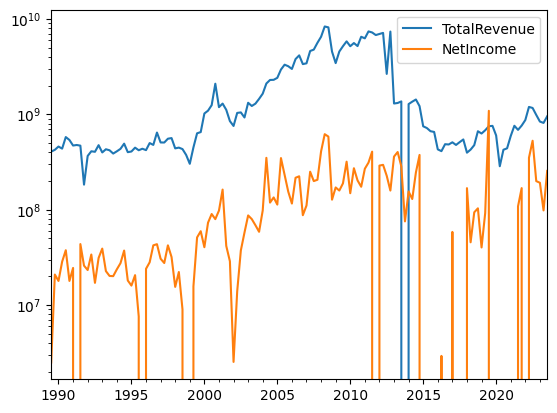

In [96]:
qfinancial_df[['TotalRevenue', 'NetIncome']].dropna().plot()
# set y-scale in log
ax = plt.gca()
ax.set_yscale('log')

<Axes: xlabel='TotalRevenue', ylabel='NetIncome'>

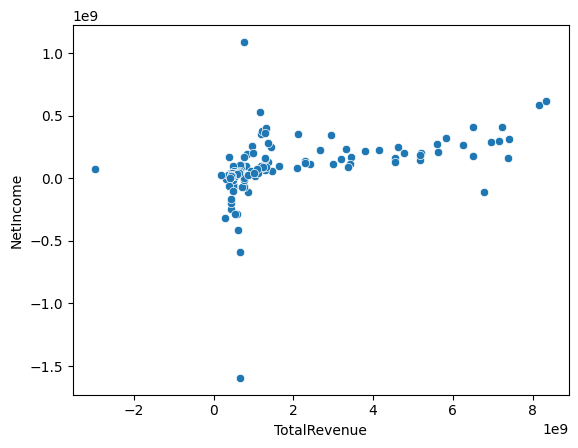

In [106]:
sns.scatterplot(data=qfinancial_df, x='TotalRevenue', y='NetIncome')

In [87]:
qfinancial_df.loc[qfinancial_df['TotalRevenue'] < 0, ['TotalRevenue', 'NetIncome']]

name,TotalRevenue,NetIncome
2013-12-31,-2963802000,75421000.0


Text(0.5, 1.0, 'Historical Stock Prices and Oil Prices')

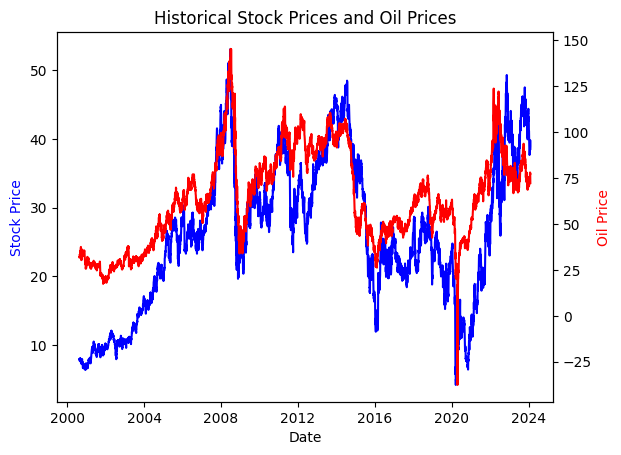

In [24]:
# plot the historical stock price and oil price
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(mur_df.index, mur_df['Close'], color='b', label='Stock Price')
ax2.plot(oil_df.index, oil_df['Close'], color='r', label='Oil Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Price', color='b')
ax2.set_ylabel('Oil Price', color='r')
plt.title('Historical Stock Prices and Oil Prices')

253 trade days in 2020

* calculating financial indicators
* conducting statistical analysis
* building predictive models based on the retrieved historical financial data

Add columns of day of week, is_holiday in the dataframe

In [25]:
# function to create features including daily returns for the dataframe mur_df, oil_df
def create_features(df):
    df['Daily Returns'] = df['Close'].pct_change()
    df['Day of Week'] = df.index.day_name()
    df['Month'] = df.index.month
    return df

In [26]:

mur_df = create_features(mur_df)
oil_df = create_features(oil_df)
print(oil_df.columns)

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'Daily Returns', 'Day of Week', 'Month'],
      dtype='object')


Pearson's R: 0.2673888946047966


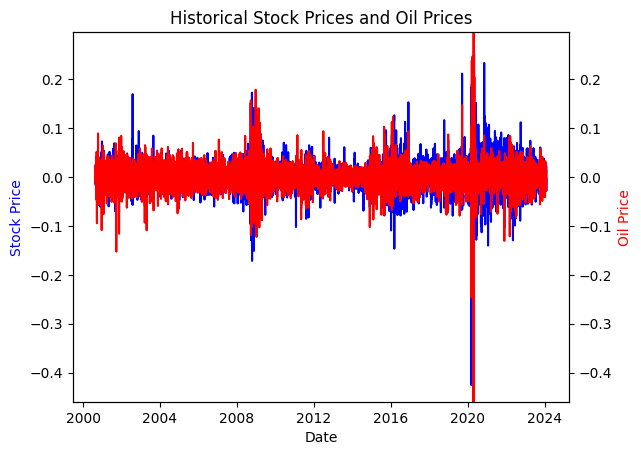

In [27]:
# plot daily returns
# plot the historical stock price and oil price
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(mur_df.index, mur_df['Daily Returns'], color='b', label='Stock Price')
ax2.plot(oil_df.index, oil_df['Daily Returns'], color='r', label='Oil Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Price', color='b')
ax2.set_ylabel('Oil Price', color='r')
ax2.set_ylim(ax1.get_ylim())
plt.title('Historical Stock Prices and Oil Prices')

# print the Pearson's R between the two variables
print('Pearson\'s R:', mur_df['Daily Returns'].corr(oil_df['Daily Returns']))

In [28]:
# ran ad-fuller test on daily returns to test for stationarity
result = adfuller(mur_df['Daily Returns'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -14.459487267073516
p-value: 6.884982395257955e-27
Critical Values: {'1%': -3.431465268306104, '5%': -2.862032844007873, '10%': -2.5670323387080183}


ADF results is more extreme than critical value at 1%, or p-value is small, so we can reject the null hypothesis. The daily returns data is stationary.